
# Supply Chain Management

This project focuses on analyzing supply chain management data to uncover insights that improve efficiency, cost management, and decision-making. The dataset used contained 100 records and 24 features, covering aspects such as product type, lead time, revenue, costs, routes, and distribution channels.

Through exploratory data analysis (EDA), the project examined:

1. Revenue trends across different lead times, routes, and product categories.
2. Cost analysis, identifying variations by product type and distribution path.
3. Route performance, evaluating revenue distribution and profitability.
4. Product comparisons, highlighting which categories contribute most to revenue and which incur higher costs.

Key findings revealed that:

1. Certain routes consistently generate higher revenue, suggesting optimization opportunities in logistics.
2. Product type significantly influences both revenue and cost, making product-specific strategies crucial.
3. Shorter lead times correlate with higher revenue generation, indicating efficiency in supply chain flow.

Import necessary libraries And Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
df = pd.read_csv('/supply_chain_data.csv')
print(df.shape)

(100, 24)


The dataset was loaded successfully in Google Colab, containing 100 records across 24 features”

In [5]:
# To see all column names
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

This shows that the dataset contains 24 columns capturing different supply chain attributes.

In [6]:
cols = df.columns.tolist()
cols

['Product type',
 'SKU',
 'Price',
 'Availability',
 'Number of products sold',
 'Revenue generated',
 'Customer demographics',
 'Stock levels',
 'Lead times',
 'Order quantities',
 'Shipping times',
 'Shipping carriers',
 'Shipping costs',
 'Supplier name',
 'Location',
 'Lead time',
 'Production volumes',
 'Manufacturing lead time',
 'Manufacturing costs',
 'Inspection results',
 'Defect rates',
 'Transportation modes',
 'Routes',
 'Costs']

The dataset contains 24 columns, including details on product type, pricing, sales, revenue, supply chain operations (such as lead time, shipping, and routes), and external factors like competitor pricing, market demand, and seasonality.

In [7]:
# Show first 5 rows with all columns fully
pd.set_option('display.max_columns', None)
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,9,Carrier B,8.630339,Supplier 4,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,3,Carrier C,5.352878,Supplier 3,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,9,Carrier A,7.904846,Supplier 4,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,7,Carrier B,1.409801,Supplier 5,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


The first five rows of the dataset were displayed to verify that all 24 columns were loaded correctly. This provided an initial view of product details, pricing, supply chain metrics, and customer-related attributes, confirming the dataset structure and data quality.

# Initial Data Exploration

In [8]:
#Quick look
#| output: False
print("\nShape:",df.shape)
print("Info:")
df.info()


Shape: (100, 24)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Loc

A quick inspection was performed to check the dataset’s dimensions and metadata. The dataset contains 100 rows and 24 columns, with data types including integers, floats, and objects. The info() output also confirmed the absence of missing values in most columns, ensuring readiness for exploratory data analysis.

In [9]:
#Summary Statistics
print("Summary:")
print(df.describe())

Summary:
            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min

The summary statistics provide key insights into the numerical variables of the dataset, such as count, mean, standard deviation, minimum, maximum, and quartiles. This helps in understanding the central tendency, spread, and overall distribution of the data.

In [10]:
print("\nMissing Values:")
df.isna().sum()


Missing Values:


,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


A missing value check was conducted across all 24 columns. The results confirmed that most fields have no null entries, ensuring data completeness and consistency for further analysis.

In [11]:
dt = df.duplicated(subset=['Lead time'])
dt.tail(10)

,0
90,True
91,True
92,True
93,True
94,True
95,True
96,True
97,True
98,True
99,True


A duplication check was performed on the Lead time column. The final 10 rows of the duplicate flag output were reviewed, where True indicates a repeated value and False denotes uniqueness. This step helped in identifying if any redundancy exists in lead time records.

In [12]:
duplicated_cols = df.columns[df.columns.duplicated()]
df.drop(columns=duplicated_cols, inplace=True)
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,9,Carrier B,8.630339,Supplier 4,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,3,Carrier C,5.352878,Supplier 3,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,9,Carrier A,7.904846,Supplier 4,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,7,Carrier B,1.409801,Supplier 5,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


A check for duplicate column names was performed. The identified duplicates were removed using drop(), ensuring that the dataset contains only unique and relevant features. This step helped maintain data integrity and avoided redundancy during analysis.

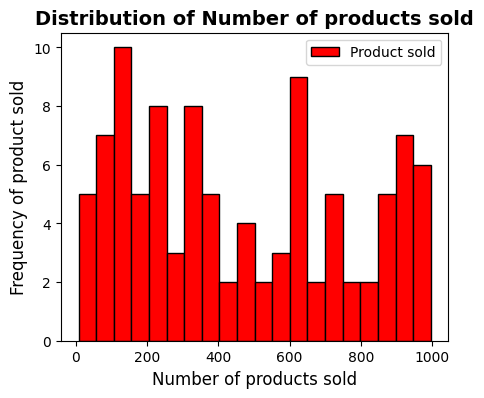

In [13]:
plt.figure(figsize=(5,4))
plt.hist(df["Number of products sold"],bins=20,color="Red",edgecolor="black",label="Product sold")

plt.xlabel("Number of products sold",fontsize=12)
plt.ylabel("Frequency of product sold",fontsize=12)
plt.title("Distribution of Number of products sold",fontsize=14,fontweight="bold")

plt.legend(loc="upper right")
plt.show()

The histogram shows the distribution of products sold across the dataset. The X-axis represents the number of products sold, while the Y-axis shows the frequency. With 20 bins, it highlights the most common sales ranges, overall spread, and variation. The chart helps identify sales patterns, such as the peak sales range, distribution shape, and potential outliers.

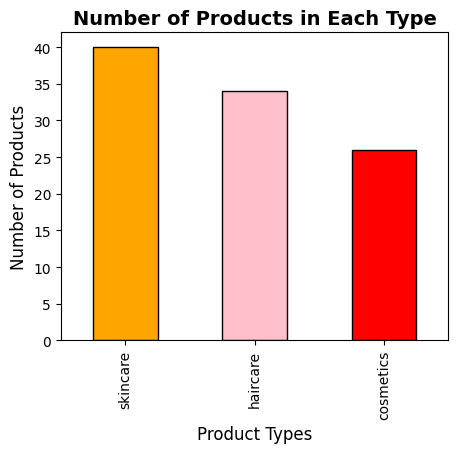

In [14]:
plt.figure(figsize=(5,4))
df["Product type"].value_counts().plot(kind="bar",color=["orange", "pink", "red"], edgecolor="black")
plt.xlabel("Product Types",fontsize=12)
plt.ylabel("Number of Products",fontsize=12)
plt.title("Number of Products in Each Type",fontsize=14,fontweight="bold")
plt.show()

The bar chart shows the number of products in each type. The X-axis represents different product types, while the Y-axis shows their respective counts. Bars are color-coded (orange, pink, red) with black edges for clarity. This visualization helps compare the popularity or availability of product types, making it easy to identify which product type is most or least common in the dataset.

In [15]:
df.groupby("Product type")["Revenue generated"].mean()

,Revenue generated
Product type,
cosmetics,6212.356385
haircare,5131.040900
skincare,6040.704053


**Average Revenue by Product Type**

The command df.groupby("Product type")["Revenue generated"].mean() calculates the average revenue generated for each product type.

1. Grouping: The dataset is grouped by the column “Product type.”

2. Aggregation: Within each group, the mean of “Revenue generated” is calculated.

3. Insight: This shows which product type generates the highest or lowest average revenue, providing useful information for evaluating product performance and profitability.

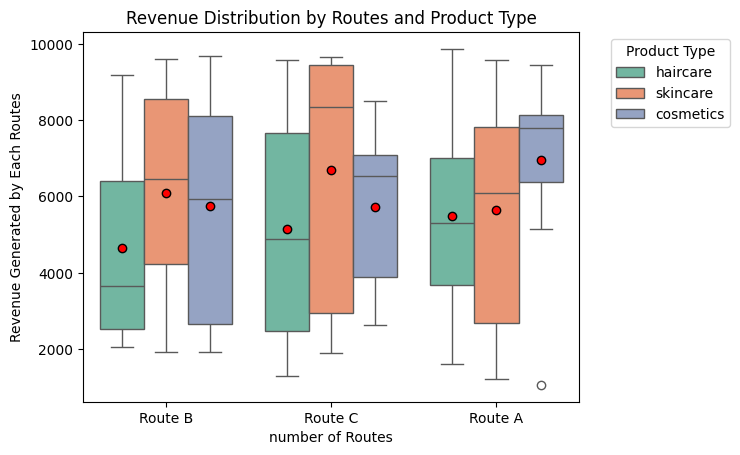

In [16]:
sns.boxplot(
    x = "Routes", y="Revenue generated",data=df,
    palette="Set2",
    showmeans=True,
    hue="Product type",
    meanprops={"marker":"o","markerfacecolor":"red","markeredgecolor":"black"})
plt.xlabel("number of Routes")
plt.ylabel("Revenue Generated by Each Routes")
plt.title("Revenue Distribution by Routes and Product Type")
plt.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

**Boxplot of Revenue Distribution by Routes and Product Type**

The boxplot illustrates the distribution of revenue generated across different routes, separated by product type.

1. X-axis (Routes): Represents the different routes.
2. Y-axis (Revenue generated): Shows the range and spread of revenue values.
3. Color palette: Uses Set2 for distinct product types.
4. Mean indicator: A red circle marks the mean revenue for each group.
5. Legend: Differentiates revenue patterns by product type.

Purpose:
This visualization highlights the spread, central tendency, and outliers in revenue for each route, while also comparing how different product types perform across routes. It helps identify:

* Routes with the highest/lowest revenue variation.
* Whether certain product types consistently generate higher revenue.
* Potential anomalies or outliers in revenue.

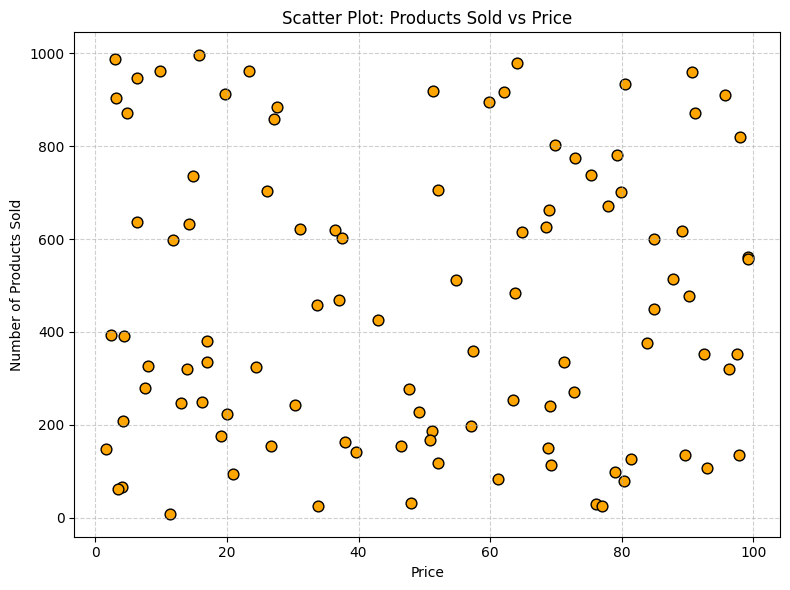

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(df["Price"],df["Number of products sold"],
            c="orange",edgecolor="black",s=60)
plt.xlabel("Price")
plt.ylabel("Number of Products Sold")
plt.title("Scatter Plot: Products Sold vs Price")
plt.grid(True, linestyle="--", alpha=0.6)   #Gridline with transparency
plt.tight_layout()
plt.show()

**Scatter Plot: Products Sold vs Price**

This scatter plot shows the relationship between product price (X-axis) and the number of products sold (Y-axis).

* Data points: Each orange dot (with black edges) represents a product observation.

* Gridlines: Added with a dashed style and transparency for better readability.

* Insight: The chart helps analyze whether higher prices correspond to lower sales (negative relationship), or if no clear pattern exists. It also makes it easy to spot clusters and potential outliers in the dataset.

In [18]:
Location_Counts = df["Location"].value_counts().sort_values(ascending=False)
Location_Counts

,count
Location,
Kolkata,25
Mumbai,22
Chennai,20
Bangalore,18
Delhi,15


**Purpose:**
This analysis identifies the most common and least common locations in the dataset, which can be used to:

* Highlight the top-performing or most frequent markets.
* Compare distribution across different locations.
* Guide resource allocation or strategy based on location frequency.

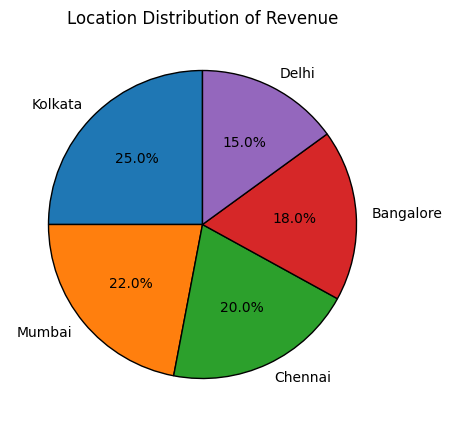

In [19]:
plt.figure(figsize=(5,5))
plt.pie(Location_Counts, labels= Location_Counts.index,startangle=90,autopct="%1.1f%%",wedgeprops={"edgecolor":"black"})
plt.title("Location Distribution of Revenue")
plt.show()

This visualization makes it easy to see which locations contribute the most records (and revenue share), and compare the relative importance of different locations in the dataset.

In [20]:
df.groupby("Supplier name")["Shipping costs"].sum()

,Shipping costs
Supplier name,
Supplier 1,148.832149
Supplier 2,126.261917
Supplier 3,71.831559
Supplier 4,103.672314
Supplier 5,104.216968


This command is used to calculate the total shipping costs for each supplier. The result of this operation is a new pandas Series where:

* The index is the unique names of the suppliers.

* The values are the total shipping costs for each corresponding supplier.

In [ ]:
df.groupby("Inspection results")["Defect rates"].mean()

,Defect rates
Inspection results,
Fail,2.569302
Pass,2.039043
Pending,2.154218


The code df.groupby("Inspection results")["Defect rates"].mean() calculates the average defect rate for each inspection result category.

In [21]:
df.groupby("Transportation modes").size().sort_values(ascending=False)

,0
Transportation modes,
Road,29
Rail,28
Air,26
Sea,17


Correlation between Revenue and Costs: 0.027252211108960943


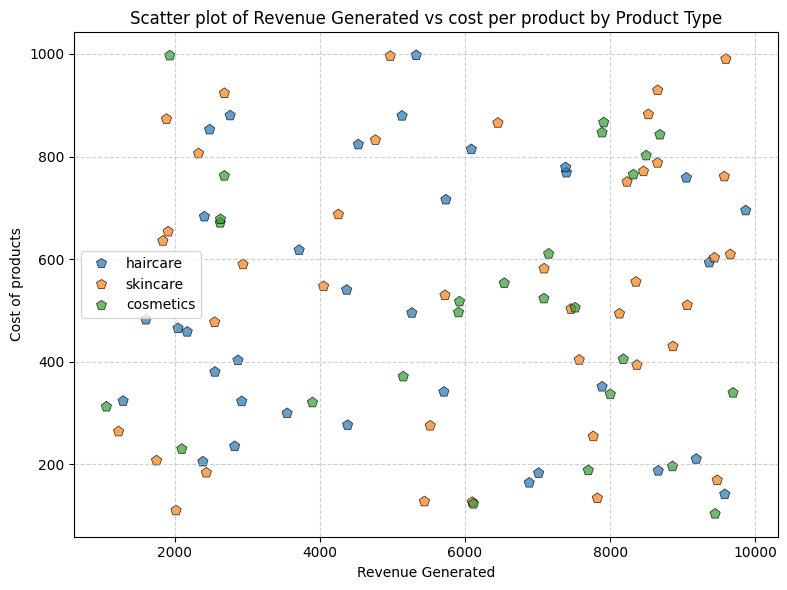

In [24]:
# Scatter plot to visualize the relationship between revenue and cost,
# colored by product type. Helps check if higher costs are associated
# with higher revenue and whether product categories show distinct patterns.
plt.figure(figsize=(8,6))
sns.scatterplot(x="Revenue generated",y="Costs",hue="Product type",data=df, alpha=0.7, s=60, edgecolor="black",marker="p")
plt.xlabel("Revenue Generated")
plt.ylabel("Cost of products")
plt.title("Scatter plot of Revenue Generated vs cost per product by Product Type")
plt.grid(True, linestyle="--", alpha=0.6)    #alpha=transparency
plt.tight_layout()
plt.legend()
corr = df["Revenue generated"].corr(df["Costs"])
print("Correlation between Revenue and Costs:", corr)
corr
plt.show()

**Scatter Plot:** Visualizes the relationship between Revenue generated and Costs, with each point colored by Product type. This helps you see if higher costs correspond to higher revenue and if different product types follow distinct patterns.

**Correlation:** Calculates the Pearson correlation coefficient between Revenue generated and Costs. This numerical value measures the linear relationship between the two variables:

* A value close to 1 means as revenue increases, costs also increase.
* A value close to -1 means as revenue increases, costs decrease.
* A value near 0 means there is little to no linear relationship.

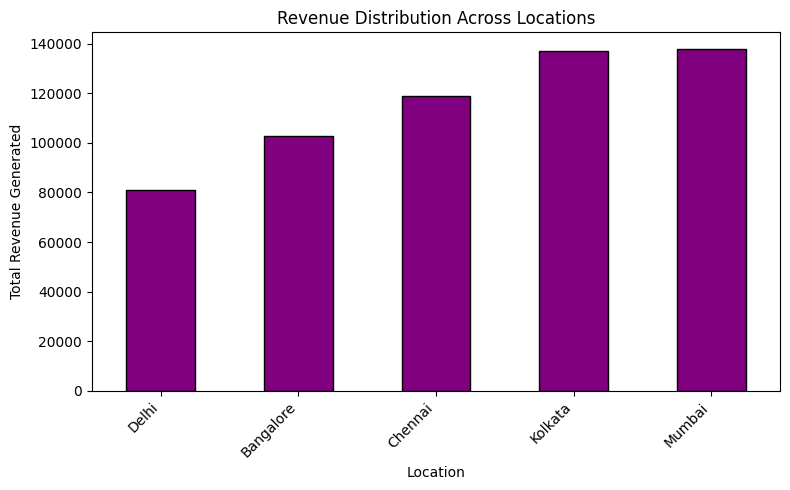

In [25]:
# Compare total revenue generated across different locations
# to identify which regions contribute most/least to overall sales
plt.figure(figsize=(8,5))
df.groupby("Location")["Revenue generated"].sum().sort_values(ascending=True).plot(
    kind="bar", color="purple", edgecolor="black"
)
plt.xlabel("Location")
plt.ylabel("Total Revenue Generated")
plt.title("Revenue Distribution Across Locations")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

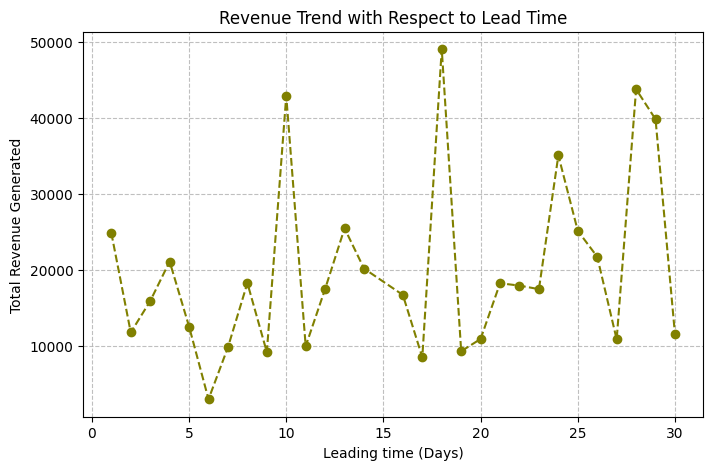

In [26]:
# Plot total revenue against lead time to observe how delivery speed
# (lead time in days) impacts overall revenue generation
plt.figure(figsize=(8,5))
df.groupby("Lead time")["Revenue generated"].sum().plot(kind="line", marker="o",linestyle="--",color="olive")
plt.xlabel("Leading time (Days)")
plt.ylabel("Total Revenue Generated")
plt.title("Revenue Trend with Respect to Lead Time")
plt.grid(True, linestyle="--",alpha = 0.8)

plt.show()

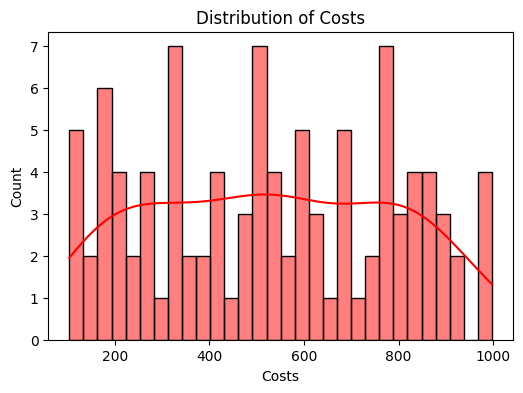

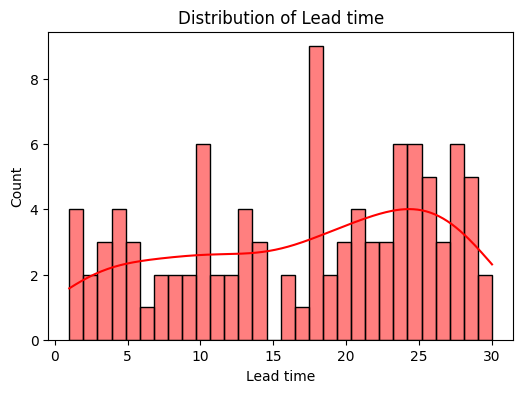

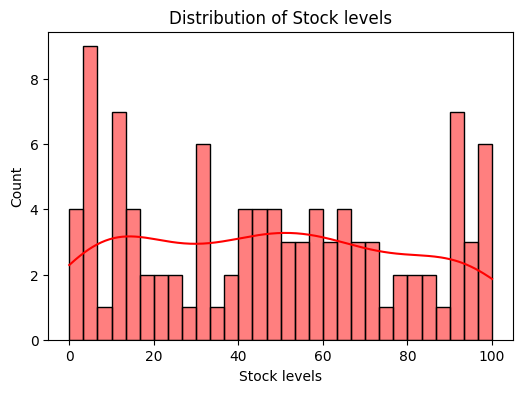

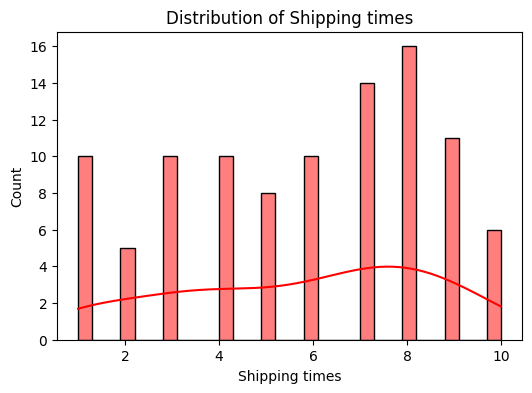

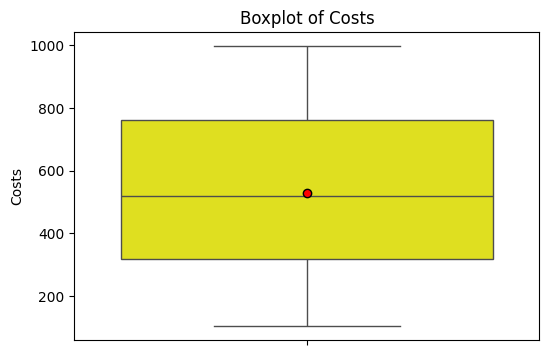

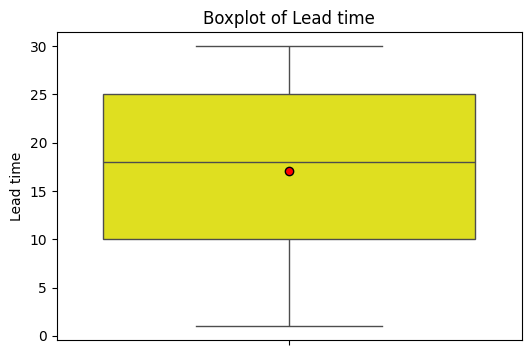

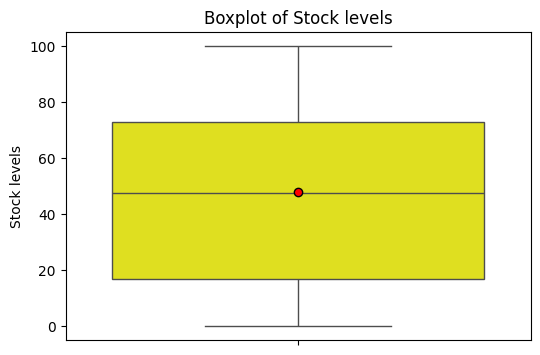

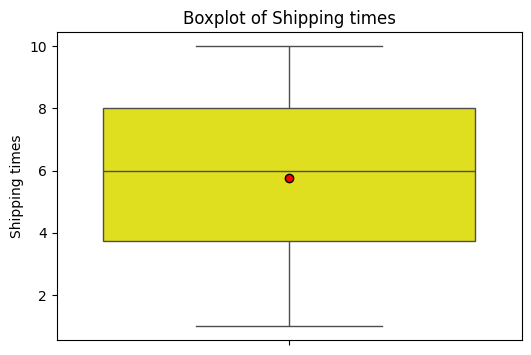

In [28]:
# Example numeric columns
cols = ['Costs', 'Lead time', 'Stock levels', 'Shipping times']

# Histograms
for col in cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30,color="Red",edgecolor="black",label="Product sold")
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplots (overall)
for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col],
    showmeans=True,color="Yellow",
    meanprops={"marker":"o","markerfacecolor":"red","markeredgecolor":"black"})
    plt.title(f"Boxplot of {col}")
    plt.show()

**Histograms:** The sns.histplot() code creates a histogram for each specified column (Costs, Lead time, etc.). A histogram shows the distribution of a single numerical variable, revealing where most of the values fall and whether the data is skewed. The kde=True parameter adds a smooth curve to better visualize the distribution shape.

**Boxplots:** The sns.boxplot() code creates a boxplot for each column. A boxplot is a five-number summary of a dataset, visualizing the median, quartiles, and potential outliers. It helps you quickly identify the central tendency, spread, and any extreme values in your data.

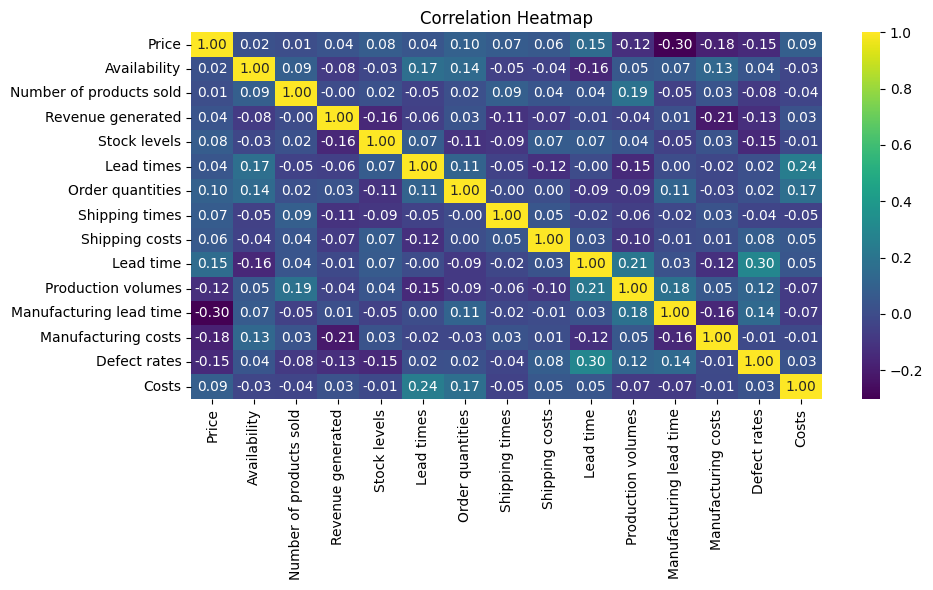

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pick only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='viridis',fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


The resulting heatmap provides a quick, visual summary of the relationships between all numerical variables. A color scale typically indicates the strength and direction of the correlation: a value close to 1 (often a warm color) indicates a strong positive relationship, a value close to -1 (a cool color) indicates a strong negative relationship, and a value close to 0 (a neutral color) indicates a weak relationship.